In [1]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

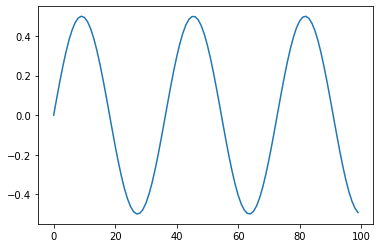

In [3]:
frequency = 440 # 주파수를 Hz단위로 표현
amplitude = 0.5 # Digital audio signal을 표현할 때 최대최소값이 [-1, 1]
duration = 3 # 길이를 초로 표현 (sec)
sample_rate = 16000 # (samples/sec)

#3초에 해당하는 샘플의 수가 얼마인지를 계산
total_number_of_samples = duration * sample_rate 
time_frame = np.arange(total_number_of_samples) # 단위: sample
# time_frame을 second 단위로 변환
time_frame_in_sec = time_frame / sample_rate
# sin파 = sin(각속도 x time)
sine_wave = np.sin(2 * np.pi * (frequency * time_frame_in_sec)) * amplitude
# Frequency (period / sec) * time (sec) = period
# 즉 주어진 시간 동안 몇번 주기를 반복했는지 (몇 바퀴 회전하였는지)
# 한바퀴 회전을 각(radian)으로 표현하면 2*pi

ipd.display(ipd.Audio(sine_wave, rate=sample_rate))
plt.plot(sine_wave[:100])

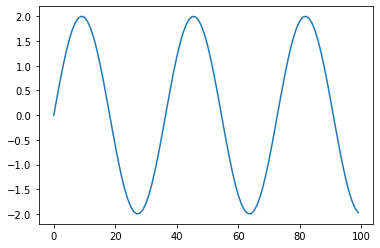

In [55]:
sine_wave = 2 * np.sin(2 * np.pi * (frequency * time_frame_in_sec))
ipd.display(ipd.Audio(sine_wave, rate=sample_rate))
plt.plot(sine_wave[:100])

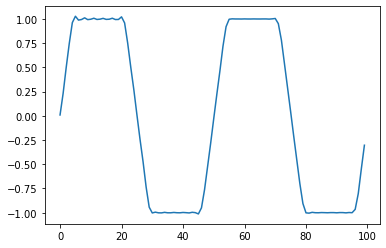

In [56]:
import soundfile as sf
sf.write('clipping.wav', data=sine_wave, samplerate=sample_rate)
sine_wave, sr = librosa.load('clipping.wav')
ipd.display(ipd.Audio(sine_wave, rate=sample_rate))
plt.plot(sine_wave[:100])

In [4]:
def make_sine_wave(freq, amp, dur, sr=16000):
  '''
  입력: Frequency, Amplitude, Duration, Sample Rate

  출력: 1D array (sample) 
  '''
  # 전역 변수 (global variable ) / 지역 변수 (local variable)
  # 
  num_samples = dur * sr
  time_frame = np.arange(num_samples)
  time_frame_sec = time_frame / sr
  return amp * np.sin(2 * np.pi * freq * time_frame_sec)
  '''
  이전에 실행했던 스크립트 코드를 그대로 가져다 쓰고 같은 변수이름의 지역변수가 없다면 
  전역변수로 저장된 값을 그대로 가져다 사용함
  '''
  # total_number_of_samples = duration * sample_rate 
  # time_frame = np.arange(total_number_of_samples) 
  # time_frame_in_sec = time_frame / sample_rate
  # sine_wave = np.sin(2 * np.pi * (frequency * time_frame_in_sec)) * amplitude

  # return sine_wave

output = make_sine_wave(880, 0.7, 5)
ipd.Audio(output, rate=sample_rate)
# print(num_samples) # 지역 변수이기 때문에 밖에서 호출이 불가능


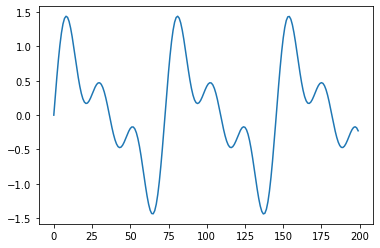

In [63]:
fund = make_sine_wave(220, 0.8, 3)
harmonic_1 = make_sine_wave(220 * 2, 0.5, 3)
harmonic_2 = make_sine_wave(220 * 3, 0.5, 3)

combine = fund + harmonic_1 + harmonic_2
plt.plot(combine[:200])
ipd.Audio(combine, rate=sample_rate)

In [6]:
import random
random.random() # 0보다 크고 1보다 작은 소수를 반환

0.41254008445308243

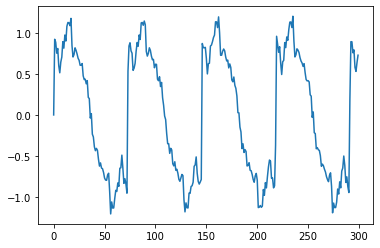

In [7]:
num_harmonics = 10
fund_frequency = 220
fund = make_sine_wave(fund_frequency, 1, 3)
for i in range(2,50):
  harmonics = make_sine_wave(fund_frequency * i, random.random()/i, 3)
  fund += harmonics
  # fund = fund + harmonics
plt.plot(fund[:300])
ipd.Audio(fund, rate=sample_rate)

# 클래스
- *클래스*란 무엇인가?
  - **클래스** 정의하기
  - 클래스 attribute
  - 클래스 method




In [11]:
def make_wave_with_harmonics(fund_frequency, num_harmonics, amplitude):
  fund = make_sine_wave(fund_frequency, amplitude, 3)
  for i in range(2,num_harmonics):
    harmonics = make_sine_wave(fund_frequency * i, amplitude*random.random()/i, 3)
    fund += harmonics
  return fund

first_output = make_wave_with_harmonics(200, 15)
ipd.Audio(first_output, rate=sample_rate)

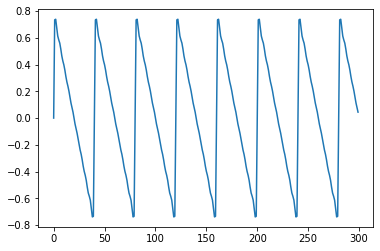

In [80]:
def make_sawtooth_wave(fund_frequency, num_harmonics, amplitude):
  fund = make_sine_wave(fund_frequency, amplitude, 3)
  for i in range(2,num_harmonics):
    harmonics = make_sine_wave(fund_frequency * i, amplitude/i, 3)
    fund += harmonics
  return fund

sawtooth_output = make_sawtooth_wave(400, 15, 0.5)
ipd.display(ipd.Audio(sawtooth_output, rate=sample_rate))
plt.plot(sawtooth_output[:300])

440


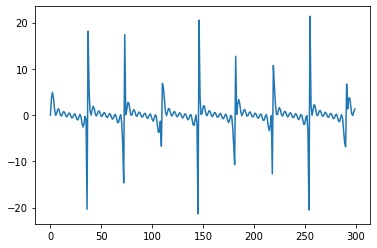

In [89]:
class Oscilator:
  def __init__(self, frequency, amplitude=1, sample_rate=16000, maximum_harmonics=30):
    self.frequency = frequency # attribute
    self.amplitude = amplitude
    self.sample_rate = sample_rate
    self.max_harm = maximum_harmonics
  
  def generate(self, duration):
    return make_sine_wave(self.frequency, self.amplitude, duration, sr=self.sample_rate)

  def generate_with_harmonics(self, duration): # class method의 첫번째 인풋은 self여야만 함
    fund = make_sine_wave(self.frequency, self.amplitude, duration, sr=self.sample_rate)
    for i in range(2,self.max_harm):
      harmonics = make_sine_wave(self.frequency * i, self.calculate_hamornics_amplitude(i), duration, sr=self.sample_rate)
      fund += harmonics
    return fund

  def calculate_hamornics_amplitude(self, i):
    return self.amplitude


oscil_a = Oscilator(440)
print(oscil_a.frequency)

output = oscil_a.generate_with_harmonics(5)
ipd.display(ipd.Audio(output, rate=oscil_a.sample_rate))
plt.plot(output[:300])

In [82]:
class RandOscil(Oscilator):
  def __init__(self, freq, amp, sr):
    super().__init__(freq, amp, sr)

  def calculate_hamornics_amplitude(self, i):
    return random.random() * self.amplitude / i
 
rand_oscil = RandOscil(440, 0.3, 16000)
# rand_oscil.frequency
ipd.Audio(rand_oscil.generate_with_harmonics(4), rate=rand_oscil.sample_rate)

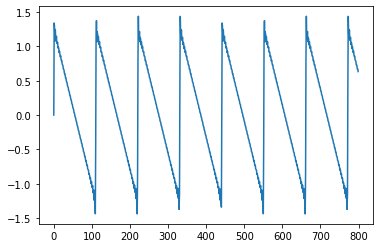

In [91]:
class SawOscil(Oscilator):
  def __init__(self, freq, amp, sr, maximum_harmonics=50):
    super().__init__(freq, amp, sr, maximum_harmonics=maximum_harmonics)

  def calculate_hamornics_amplitude(self, i):
    return self.amplitude / i
  
saw_oscil = SawOscil(400, 0.8, 44100, maximum_harmonics=40)
saw_wave = saw_oscil.generate_with_harmonics(2)
ipd.display(ipd.Audio(saw_wave, rate=saw_oscil.sample_rate))
plt.plot(saw_wave[:800])
 

In [58]:
saw_wave.shape

(88200,)

In [ ]:
np.sin(np.pi) # sin(pi) == 0

In [ ]:
print(time_frame_in_sec.shape)
np.sin(time_frame_in_sec)